# Exploring Helicopter Prison Breaks

## Table of Contents

- Introduction: The Great Escape
- Data Collection and Preparation
  - 1. Data Collection, Challenges and Limitations
  - 2. Preparing Data for Analysis: Python Implementation
    - 2.1 Python Libraries
    - 2.2 Extract Data and convert it into Pandas DataFrame
    - 2.3 Removing Redundant Columns
- Analyzing Helicopter Escape Attempts
  - 3. Examining Helicopter Escape Attempts by Year
    - 3.1 Extracting Year from Data
    - 3.2 Frequency of escapes
    - 3.3 Visualizing Attempts by Year
    - 3.4 Observations on the Data
  - 4. Examining Helicopter Escape Attempts by Country
    - 4.1 Top countries for prison escapes
    - 4.2 Visualizing Attempts by Country
    - 4.3 Around the World
  - 5. The Audacity of Inmates
    - 5.1 The Escape Artists
    - 5.2 The Persistent Escapers
    - 5.3 The Extraordinary Feats of Pascal Payet, Michel Vaujour, and Vassilis Paleokostas
    - 5.4 Breaking Free: Analysis of Inmates Attempting Multiple Helicopter Prison Escapes
- Successful Jailbreak Rates
  - 6. Breakout Outcomes
  - 7. Evaluating Helicopter Escape Success
- Conclusion: Escaping the Impossible

## Introduction: The Great Escape
Welcome to my exploratory data analysis (EDA) project on prison breaks. My goal is to gain insights into the intriguing phenomenon of helicopter prison breaks by analyzing real-world data.

In this project, I will focus on analyzing data related to helicopter prison breaks. I will be obtaining the data from [Wikipedia](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes), which is a comprehensive source of information on this topic. It's important to note that the data may be subject to updates, and as such, my findings may differ from future analyses.

By conducting this analysis, I hope to not only uncover interesting patterns and trends but also hone my skills in data preparation and analysis using Python. This project serves as my first portfolio piece in Jupyter Notebook, which allows me to showcase my code and effectively communicate my findings.

During my exploratory data analysis, I will seek to answer some crucial questions regarding helicopter prison breaks. Specifically, I will examine which year had the highest number of attempted helicopter prison breaks and which countries experienced the most attempts. Additionally, I will investigate whether certain inmates tried to escape more than once and determine what percentage of them successfully escaped. By answering these questions, I hope to gain deeper insights into this fascinating phenomenon and develop a comprehensive understanding of the data.

Please join me on this exciting journey as I dive into the data and uncover new insights.

## Data Collection and Preparation
### 1. Data Collection, Challenges and Limitations
The data was collected from the "List of helicopter prison escapes" page on [Wikipedia](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) and the format of the data is in tabular form. The dataset consists of 48 rows and 6 columns, with all columns having object data types. However, the 'Escapee(s)' column contains missing values which we will be filling with NaN values to maintain the integrity of our analysis.

It is important to note that there may be potential biases and limitations associated with the data used. For example, there may be underreporting of incidents, particularly in countries where the media is tightly controlled or where access to information is limited. Additionally, the accuracy and completeness of the data may be affected by the quality of the sources used to compile the information. It is possible that some incidents were incorrectly reported or categorized, which could impact the overall analysis. Therefore, these factors should be taken into consideration when interpreting the results of our analysis.

### 2. Preparing Data for Analysis: Python Implementation
#### 2.1 Python Libraries:
With the project and dataset introduced, it is time to delve into the code that will power our analysis.

To manipulate, visualize, and analyze the data, we will leverage several widely-used Python libraries. Below is a brief rundown of the libraries that will be instrumental in our analysis:

- requests: We'll be using the requests library to make HTTP requests and download the data from the Wikipedia page.
- BeautifulSoup: We'll use BeautifulSoup to parse the HTML code of the Wikipedia page and extract the relevant data.
- datetime: The datetime module will help us work with the dates in our dataset.
- pandas: A widely used library for data manipulation, analysis, and cleaning. It offers powerful data structures, efficient handling and processing of complex datasets, and user-friendly interface.
- matplotlib: The matplotlib library is a powerful tool for creating visualizations. We'll be using it to create various charts and graphs to help us visualize the data.
- matplotlib.pyplot: The pyplot sublibrary of matplotlib provides an easy-to-use interface for creating charts and graphs.
- %matplotlib inline: This magic command is used to display the plots within the Jupyter Notebook itself rather than in a separate window or file.
- matplotlib.colors: We'll be using this module to customize the colors of our plots.
- PrettyTable: We'll use this library to create formatted tables for presenting our findings.
- defaultdict: This subclass of the built-in dictionary in Python will help us to efficiently count the occurrences of certain values in our data.
- re: The re module provides support for regular expressions, which will be useful for parsing some of the data in our dataset.
- unicodedata: We'll be using the unicodedata module to normalize the characters in our dataset.
- numpy: This library is widely used for numerical computing, data manipulation, and analysis. We'll use it to perform various statistical calculations on our dataset.

By using these libraries, we will efficiently clean, manipulate, and analyze the data in our dataset. Let's get started!

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from prettytable import PrettyTable
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

#### 2.2 Extract Data and convert it into Pandas DataFrame:
After importing the necessary libraries for the analysis, the extracted data needs to be converted into a more convenient format. A Pandas DataFrame can be used to achieve this, as it is a powerful tool for data manipulation and analysis.

The DataFrame can be created by passing the extracted data and header row as arguments to the pd.DataFrame() function. This allows for labeling of the columns of the DataFrame with appropriate headers, making it easier to work with and analyze.

To gain an initial understanding of the dataset's structure and content, it's useful to take a quick look at the data before creating the DataFrame. Printing the first three rows of the extracted data and the header row provides this initial glimpse into the dataset.

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

# Download the web page data
response = requests.get(url)
html = response.content

# Parse the HTML code using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Find all table elements on the page
tables = soup.find_all("table")

# Loop through each table and find the one with the desired header row
desired_table = None
header_row = None
rows = None

for table in tables:
    rows = table.find_all("tr")
    header_row = [cell.text.strip() for cell in rows[0].find_all("th")]
    if "Date" in header_row and "Prison name" in header_row:
        desired_table = table
        break

# Extract the data rows
data = []
for row in rows[1:]:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Print the header row and first 3 rows of data
print("Header:")
print(header_row, "\n")
print("First 3 rows of Data:")
for row in data[:3]:
    print(row)

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=header_row)

Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 3 rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City.  Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3]  The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape i

#### 2.3 Removing Redundant Columns:
To simplify our analysis and focus on relevant features, we removed the 'details' column. It contained redundant information and could introduce noise. By removing this column, the data can be more easily and accurately analyzed, and insights that are more directly applicable to the project's goals can be gained.

In [3]:
# Remove the "Details" column
df = df.drop("Details", axis=1)

# To enhance readability, set the maximum column width to 30 characters.
pd.set_option('display.max_colwidth', 30)

print(df[:3])

               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973                  Mountjoy Jail        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David Kaplan\nCarlos ...  
1  JB O'Hagan\nSeamus TwomeyK...  
2  Garrett Brock TrapnellMart...  


## Analyzing Helicopter Escape Attempts
### 3. Examining Helicopter Escape Attempts by Year

#### 3.1 Extracting Year from Data:
Now, we can move on to analyzing the frequency of escape attempts over time. To achieve this, we first need to extract the year from the 'Date' column. We used the 'pd.to_datetime' function from the Pandas library to convert this column to a datetime format and then extracted the year using the 'dt.year' attribute. The resulting dataframe displays the first three rows with the modified 'Date' column, showing only the year.

In [4]:
# Convert the Date column to a datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.year

# Display the first three rows with the modified 'Date' column
print(df[:3])

   Date                    Prison name        Country Succeeded  \
0  1971          Santa Martha Acatitla         Mexico       Yes   
1  1973                  Mountjoy Jail        Ireland       Yes   
2  1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David Kaplan\nCarlos ...  
1  JB O'Hagan\nSeamus TwomeyK...  
2  Garrett Brock TrapnellMart...  


#### 3.2 Frequency of escapes:
Here, our goal is to determine the frequency of helicopter escape attempts over time. To accomplish this, we created a frequency table by grouping the data by year and counting the occurrences. We then sorted the data by year to make it easier to identify trends. Our next step was to identify the years with the highest number of escape attempts by using the max() function and applying Boolean indexing to select the corresponding rows. The resulting output provides us with the years that saw the highest number of attempts.

In [5]:
# Group the data by year and count the number of occurrences
freq_table = df.groupby('Date').size()

# Sort the table by year in ascending order
freq_table = freq_table.sort_index()

# Print the frequency table
print(freq_table)

# Code to identify the years with the highest number of helicopter escapes
max_value = freq_table.max()
max_years = freq_table[freq_table == max_value].index
max_years_str = ", ".join(str(year) for year in max_years)
print(f"\nThe years with the highest number of helicopter escapes are: {max_years_str}.")

Date
1971    1
1973    1
1978    1
1981    2
1983    1
1985    2
1986    3
1987    1
1988    1
1989    2
1990    1
1991    1
1992    2
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    2
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1
dtype: int64

The years with the highest number of helicopter escapes are: 1986, 2001, 2007, 2009.


#### 3.3 Visualizing Attempts by Year:
After obtaining the frequency table of helicopter escapes per year, visualizing the data on a graph can enhance our understanding of the trends. To create a bar plot, we converted the year values to strings and excluded years with no escape attempts.

The resulting bar plot displays the number of helicopter escape attempts each year. By examining the heights of the bars, we can quickly identify the years with the highest number of helicopter escapes. To improve the clarity of the plot, we added some stylistic elements, such as removing the spines, setting the tick colors to grey, and including a dotted line at the 2-attempt mark.

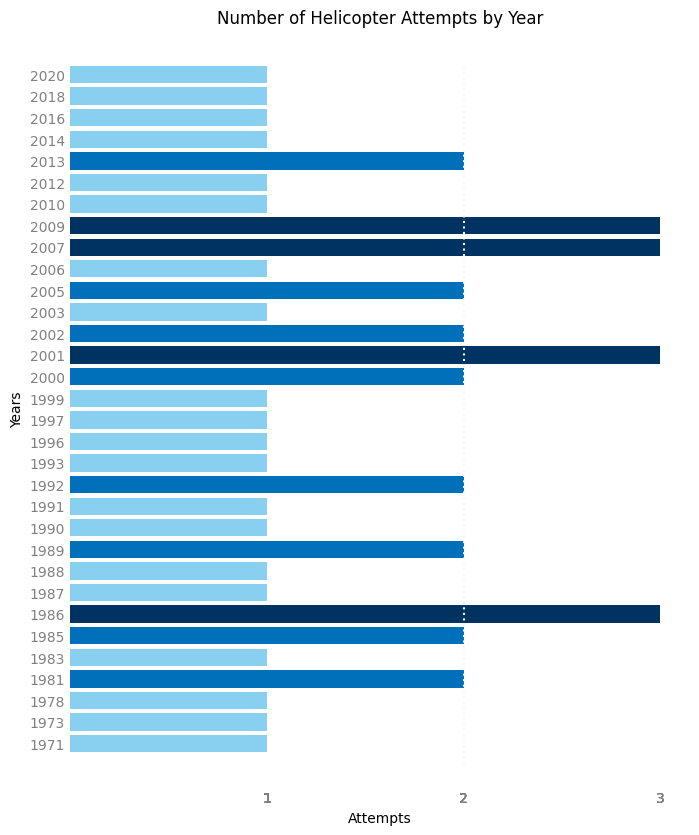

In [6]:
# Convert year values to string to exclude empty years from the plot
years = freq_table.index.astype(str)

# Get the values of the frequency table
attempts = freq_table.values

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
colors = ['#89CFF0' if x == 1 else '#0070BB' if x == 2 else '#003262' 
         for x in attempts]
plt.barh(years, attempts, color=colors)
plt.title("Number of Helicopter Attempts by Year")
plt.xlabel("Attempts")
plt.ylabel("Years")

# Style the plot
plt.xticks(attempts, color='grey')
plt.yticks(years, color='grey')
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
for x in [2]:
    plt.axvline(x=x, linestyle=':', color='#F0F8FF', ymin=0.03, ymax=0.96)

plt.show()

#### 3.4 Observations on the Data:
The graph of helicopter prison escape attempts does not reveal any discernible patterns or trends. It is possible that the randomness of the data could be due to a lack of information or the presence of multiple contributing factors that are difficult to measure.

### 4. Examining Helicopter Escape Attempts by Country
#### 4.1 Top countries for prison escapes:
In this section, we aim to gain insights into the geographic distribution of helicopter escape attempts. To do so, we created a frequency table that counts the number of attempts per country using the country data from the original dataset. We used the PrettyTable library to present the data in a clear and organized manner. The table is sorted in descending order, displaying the number of attempts for each country. 

In [7]:
# Creating a PrettyTable
table = PrettyTable()
table.field_names = ["Country", "Attempts"]
table.horizontal_char = "."  # set the horizontal border character to "-"
table.vertical_char = "|"  # set the vertical border character to "|"
table.junction_char = "+"  # set the corner character to "+"

# Create a dictionary that returns a default value of 0 for any nonexistent key
countries = defaultdict(int)

# Creating a frequency table
for attempt in data:
    country = attempt[2]
    countries[country] += 1

# Sorting countries in descending order by the number of attempts
sorted_countries = sorted(countries.items(), key=lambda x: x[1], reverse=True)

for country, attempts in sorted_countries:
    table.add_row([country, attempts])

print(table)

+................+..........+
|    Country     | Attempts |
+................+..........+
|     France     |    15    |
| United States  |    8     |
|     Canada     |    4     |
|     Greece     |    4     |
|    Belgium     |    4     |
|   Australia    |    2     |
|     Brazil     |    2     |
| United Kingdom |    2     |
|     Mexico     |    1     |
|    Ireland     |    1     |
|     Italy      |    1     |
|  Puerto Rico   |    1     |
|     Chile      |    1     |
|  Netherlands   |    1     |
|     Russia     |    1     |
+................+..........+


#### 4.2 Visualizing Attempts by Country:
We created a bar plot to provide a more intuitive visualization of the data. We will also delve into the countries where these attempts took place to uncover any potential patterns or trends.

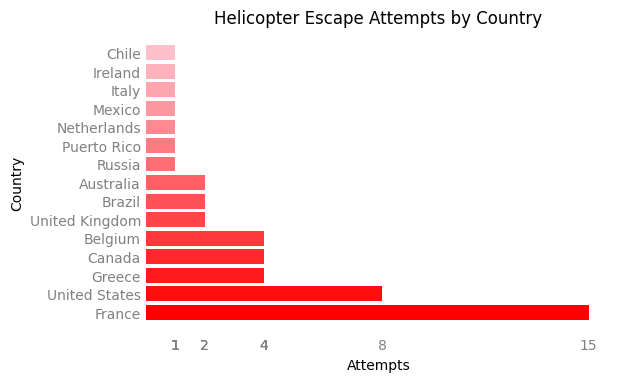

In [8]:
# Group the data by Country and count the number of occurrences
freq_country = df.groupby('Country').size().sort_values(ascending=False)

country = freq_country.index.astype(str)
attempts_per_country = freq_country.values

# Define the start and end red colors of the gradient
start_color = mcolors.CSS4_COLORS['red']
end_color = mcolors.CSS4_COLORS['pink']

# Define the number of colors in the gradient (same as the number of x-axis values)
num_colors = len(attempts_per_country)

# Create the gradient of colors
colors = mpl.colors.LinearSegmentedColormap.from_list("", [start_color, end_color], num_colors)

# Plotting the bars
plt.barh(country, attempts_per_country, color=colors(range(num_colors)))
plt.title("Helicopter Escape Attempts by Country")
plt.xlabel("Attempts")
plt.ylabel("Country")
plt.xticks(attempts_per_country, color='grey')
plt.yticks(country, color='grey')
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

#### 4.3 Around the World:
Helicopter prison breaks are a fascinating and alarming phenomenon that have occurred in various regions of the world, including Europe, South America, Central America, North America, and Eastern Europe (specifically, Russia). Surprisingly, there have been no reported incidents of such daring escapes in Africa, Asia, or the Middle East. While the reasons behind this are not yet clear, it is possible that media restrictions or limitations on information sharing in these areas have played a role.

Digging deeper into the data, we can see that France takes the lead with a whopping 15 helicopter prison escapes - more than twice as many as the second-place country, the United States, which had 8 attempts. The reasons for this trend require further investigation and could be related to unique aspects of France's prison system or security measures. Greece, Canada, and Belgium followed closely behind with 4 attempts each, while the United Kingdom, Brazil, and Australia had 2 attempts. Finally, there were single attempts in Russia, Puerto Rico, Netherlands, Mexico, Italy, Ireland, and Chile.

These findings highlight the need for prison officials worldwide to remain vigilant and address potential security risks. By doing so, we can prevent future incidents of daring helicopter prison breaks that could put the public at risk and undermine the integrity of our justice systems.

### 5. The Audacity of Inmates
#### 5.1 The Escape Artists:
Our focus is now on the elusive individuals who attempted helicopter prison escapes, particularly those who did it multiple times. But first, we ensure our data is clean by scrubbing it with meticulous attention to detail. We remove any hindering characters and standardize names, replacing empty strings with NaN. Despite our efforts, some rows require manual attention, and we check and double-check each record to ensure accuracy. Now armed with trustworthy data, we embark on our investigation into these audacious escapees, uncovering their stories of risking it all for freedom.


In [9]:
pd.set_option('display.max_colwidth', 80)

# Replace '\n' and '—' characters with a space
df['Escapee(s)'] = df['Escapee(s)'].str.replace('\n', ', ')
df['Escapee(s)'] = df['Escapee(s)'].str.replace('—', ' ')

# Add spaces between names
df['Escapee(s)'] = df['Escapee(s)'].apply(lambda x: unicodedata.normalize('NFKD', x).
                                          encode('ASCII', 'ignore').decode('utf-8'))
df['Escapee(s)'] = df['Escapee(s)'].apply(lambda x: re.
                                          sub(r'(?<!Mc)(?<!Mc )(?<=[a-z\)])(?=[A-Z])', ', ', x))

# Remove empty strings from the 'Escapee(s)' column and replace with NaN
df['Escapee(s)'] = df['Escapee(s)'].str.strip().replace('', np.nan)

# Manually updating rows 12, 29 and 37
df.loc[12, 'Escapee(s)'] = 'Mahoney Danny, Francis Mitchell, Randy Lackey'
df.loc[29, 'Escapee(s)'] = 'Orlando Cartagena, Jose Rodriguez, Victor Diaz, Hector Diaz, Jose Tapia'
df.loc[37, 'Escapee(s)'] = 'Vassilis Paleokostas, Alket Rizai'

print("List of Escapees:\n")
print(df['Escapee(s)'])

List of Escapees:

0                          Joel David Kaplan, Carlos Antonio Contreras Castro
1                                     JB O'Hagan, Seamus Twomey, Kevin Mallon
2        Garrett Brock Trapnell, Martin Joseph McNally, James Kenneth Johnson
3                                               Gerard Dupre, Daniel Beaumont
4                       Marina Paquet (hijacker), Giles Arseneault (prisoner)
5                                                              David McMillan
6             James Rodney Leonard, William Douglas Ballew, Jesse Glenn Smith
7                             Jose Carlos dos Reis Encina, a.k.a. "Escadinha"
8                                                              Michel Vaujour
9                                                              Samantha Lopez
10                    Andre Bellaiche, Gianluigi Esposito, Luciano  Cipollari
11                                                Sydney Draper, John Kendall
12                              Mahoney Danny

#### 5.2 The Persistent Escapers:
In this data analysis project, we investigated helicopter prison breaks and identified recurrent escapees. To do so, we parsed through a dataset of escapees and checked for duplicate names in the 'Escapee(s)' column.

In [10]:
# create a set to store the duplicated names
repeated_escapees = set()

# loop through each cell in the 'Escapee(s)' column
for i, cell1 in enumerate(df['Escapee(s)']):
    # if the cell has a 'nan' value, skip to the next one
    if pd.isna(cell1):
        continue
    # loop through the remaining cells below the current one
    for j, cell2 in enumerate(df['Escapee(s)'][i+1:], i+1):
        if pd.isna(cell2):
            continue
        # split the current cell and the cell below it into lists of names
        names1 = cell1.split(', ')
        names2 = cell2.split(', ')
        # loop through each name in the first cell
        for name1 in names1:
            # if the name appears in the second cell
            if name1 in names2:
                # check if there are multiple names in the first cell
                if len(names1) > 1:
                    # loop through each name in the second cell
                    for name2 in names2:
                        # if the name in the second cell matches the current name in the first cell
                        if name1 == name2:
                            # add the name and the next name in the first cell to the set
                            repeated_escapees.add(name1 + " " + names1[names1.index(name1)+1])
                            break
                else:
                    # add the name to the set
                    repeated_escapees.add(name1)

# print the set of duplicated names, if any
if repeated_escapees:
    print("Recurrent escapees:")
    for name in repeated_escapees:
        print(f"- {name}")
else:
    print("No duplicated names found.")

Recurrent escapees:
- Vassilis Paleokostas
- Michel Vaujour
- Pascal Payet


#### 5.3 The Extraordinary Feats of Pascal Payet, Michel Vaujour, and Vassilis Paleokostas:
In the world of prisons, inmates have always sought ways to escape the monotony and isolation of their cells. Some use ingenious techniques like digging tunnels, forging fake identities, or even bribing guards. But there are some inmates who go beyond conventional means, daring to attempt the impossible: breaking out of prison by helicopter. These daring individuals are the subject of our latest analysis.

As we venture more into our investigation, we uncover a remarkable trend that challenges all expectations. Three inmates - Pascal Payet, Michel Vaujour, and Vassilis Paleokostas - attempted not one, but two helicopter escapes. It takes an extraordinary level of determination and audacity to try such a feat multiple times, and we can't help but wonder what compelled them to take such risks.

But the question remains: did they manage to pull it off? Our analysis will uncover whether these daring inmates managed to outsmart the authorities and achieve their freedom, or if they were caught and returned to their cells. We will also dive into the specifics of when and where these daring attempts were made, piecing together the events that led to these audacious prison breaks.

So join us on a journey of discovery, as we unravel the stories of these inmates who risked everything for their freedom, and the authorities who were determined to bring them back to justice.

In [11]:
pd.set_option('display.max_colwidth', 23)

# drop rows with NaN values in 'Escapee(s)' column and create a temporary copy of the dataframe
temporary_df = df.dropna(subset=['Escapee(s)'], inplace=False)

# define the desired column order
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
               
# filter the dataframe to include only rows with duplicated names in the 'Escapee(s)' column
duplicated_df = temporary_df[temporary_df['Escapee(s)'].str.contains('|'.join(repeated_escapees))]

# reorder the columns of the filtered dataframe based on the defined order
duplicated_df = duplicated_df.reindex(columns=column_order)

# print the filtered dataframe with columns in the specified order
print("The Unstoppable: Recurrent Escapees")
print(duplicated_df)


The Unstoppable: Recurrent Escapees
                Escapee(s) Succeeded             Prison name  Date Country
8           Michel Vaujour       Yes      Prison de la Santé  1986  France
19          Michel Vaujour        No  Touraine Central Pr...  1993  France
25            Pascal Payet       Yes           Luynes prison  2001  France
33    Vassilis Paleokostas       Yes       Korydallos Prison  2006  Greece
35            Pascal Payet       Yes           Grasse prison  2007  France
37  Vassilis Paleokosta...       Yes       Korydallos Prison  2009  Greece


#### 5.4 Breaking Free: Analysis of Inmates Attempting Multiple Helicopter Prison Escapes
Helicopter prison breaks have long been a source of fascination and intrigue, capturing the imagination of both Hollywood filmmakers and real-life criminals. Through our data analysis project, we delved into the stories of inmates who attempted to escape from prison using a helicopter on multiple occasions.

Our research uncovered three such cases, two of which occurred in France, and one in Greece. The first inmate was Michel Vaujour, who in 1986 successfully escaped from Prison de la Santé in France using a helicopter. However, his luck ran out in 1993 when he tried to escape from Touraine Central Prison but failed, and was eventually caught and transferred to a high-security prison.

The second inmate, Pascal Payet, had a taste for high-flying escapes, and succeeded in two attempts. In 2001, he made his first escape from Luynes prison in France using a helicopter. Five years later, he escaped again, but this time from Grasse prison, also in France, again using a helicopter.

The third and final inmate in our study was Vassilis Paleokostas, who also managed to pull off not just one, but two helicopter escapes from the same prison, Korydallos Prison in Greece. The first time was in 2006, and the second time he escaped with another inmate in 2009.

These cases shed light on the persistent allure of helicopter escapes and their potential for success. They also demonstrate the lengths to which some criminals are willing to go to evade justice. Our findings offer valuable insights into the history and effectiveness of these daring prison breaks.

## Successful Jailbreak Rates
### 6. Breakout Outcomes:
When it comes to helicopter prison escapes, the ultimate goal is to successfully escape and avoid being caught. In this part of our analysis, we will examine the success rate of these fearless attempts.

Our dataset includes a total of 48 helicopter prison breaks, but how many of them were successful? We will answer this question and provide insights into the factors that could influence the success or failure of a helicopter prison escape.

In [12]:
# Create a frequency table with the 'Succeeded' column
success = df['Succeeded'].value_counts()['Yes']
failure = df['Succeeded'].value_counts()['No']

total = success + failure

success_percentage = success * total / 100
failure_percentage = failure * total / 100

print(f"Total: {total}\nSuccess: {success}\nFailure: {failure} ")

Total: 48
Success: 34
Failure: 14 


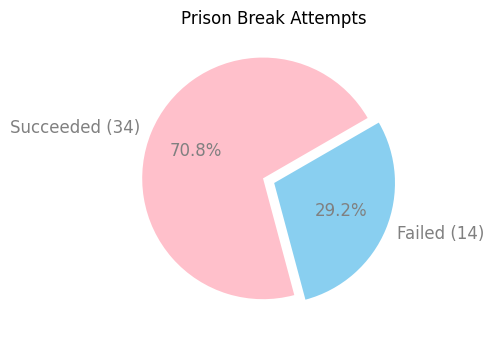

In [13]:
# Create pie chart
labels = ['Succeeded (34)','Failed (14)']
sizes = [success_percentage, failure_percentage]
colors = ['pink', '#89CFF0']
explode = (0.1, 0)  # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=30, textprops={'color': 'grey', 'fontsize': 12})
plt.title('Prison Break Attempts')
plt.show()

### 7. Evaluating Helicopter Escape Success:
In the shadowy world of prison escapes, few methods are as daring as using a helicopter to break free from captivity. Our analysis uncovered a total of 48 attempts, each one a heart-stopping gambit for freedom. Of these, 34 were successful, a testament to the audacity and resourcefulness of the escapees. But in 14 cases, the dream of freedom was shattered by the unforgiving reality of the prison system.

These numbers offer a glimpse into the high stakes of a helicopter prison escape. The success rate of 71% shows that for those brave enough to try, this method can be a path to liberation. But the 29% failure rate also serves as a sobering reminder that even the boldest plans can falter in the face of overwhelming obstacles.

## Conclusion: Escaping the Impossible

With the aim of unearthing patterns and trends, we embarked on a quest to prepare and analyze data related to helicopter prison escapes. We delved deep into the "List of Helicopter Prison Escapes" on Wikipedia, and the findings were nothing short of astounding.

Out of a total of 48 attempts, 34 were successful, while only 14 prisoners were left stranded behind bars. Our analysis revealed that a small number of inmates had the audacity to attempt a second escape, with only one failing the second time around.

Moreover, we uncovered a shocking revelation that France led the pack with an enormous 15 helicopter escapes, leaving the United States trailing behind in second place with just 8 escapes.

Despite our best efforts, our data was limited, and as a result, we could not identify any significant trends. Nonetheless, this project serves as a reminder of the sheer audacity and determination of those willing to risk everything for freedom.